We want to find the intersection of an arbitrary ray with a convex hull. Fortunately, this isn't a new problem, so we can just copy-paste stack overflow:

https://stackoverflow.com/questions/30486312/intersection-of-nd-line-with-convex-hull-in-python

Of course, because Python is an evolving language, we need to modify the code slightly. Note that the order of U,V is reversed from the sample code linked above.

In [4]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import ConvexHull

In [5]:
def hit(U,hull):
    eq=hull.equations.T
    V,b=eq[:-1],eq[-1]
    alpha=-b/np.dot(U,V)
    return np.min(alpha[alpha>0])*U

def manyhit(U,hull):
    hitpoints = []
    for Uvec in U:
        hitpoints.append(hit(Uvec,hull))
    return np.array(hitpoints)

In [6]:
X, Y, Z, A = np.genfromtxt("cylinder-surface.txt", comments='%', unpack=True)
mesh = np.array((X.T,Y.T,Z.T)).T
hull = ConvexHull(mesh)

In [7]:
# isox = []; isoy = []; isoz = [];
iso = []
for t in np.linspace(0,2*np.pi,200):
    iso.append(np.sin(.75*t)*np.cos(t*3))
    iso.append(np.sin(.75*t)*np.sin(t*3))
    iso.append(np.cos(.75*t))
vecpoint = np.reshape(iso,(-1,3))

In [8]:
allpoints = manyhit(vecpoint,hull)

/home/doug/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


<IPython.core.display.Javascript object>


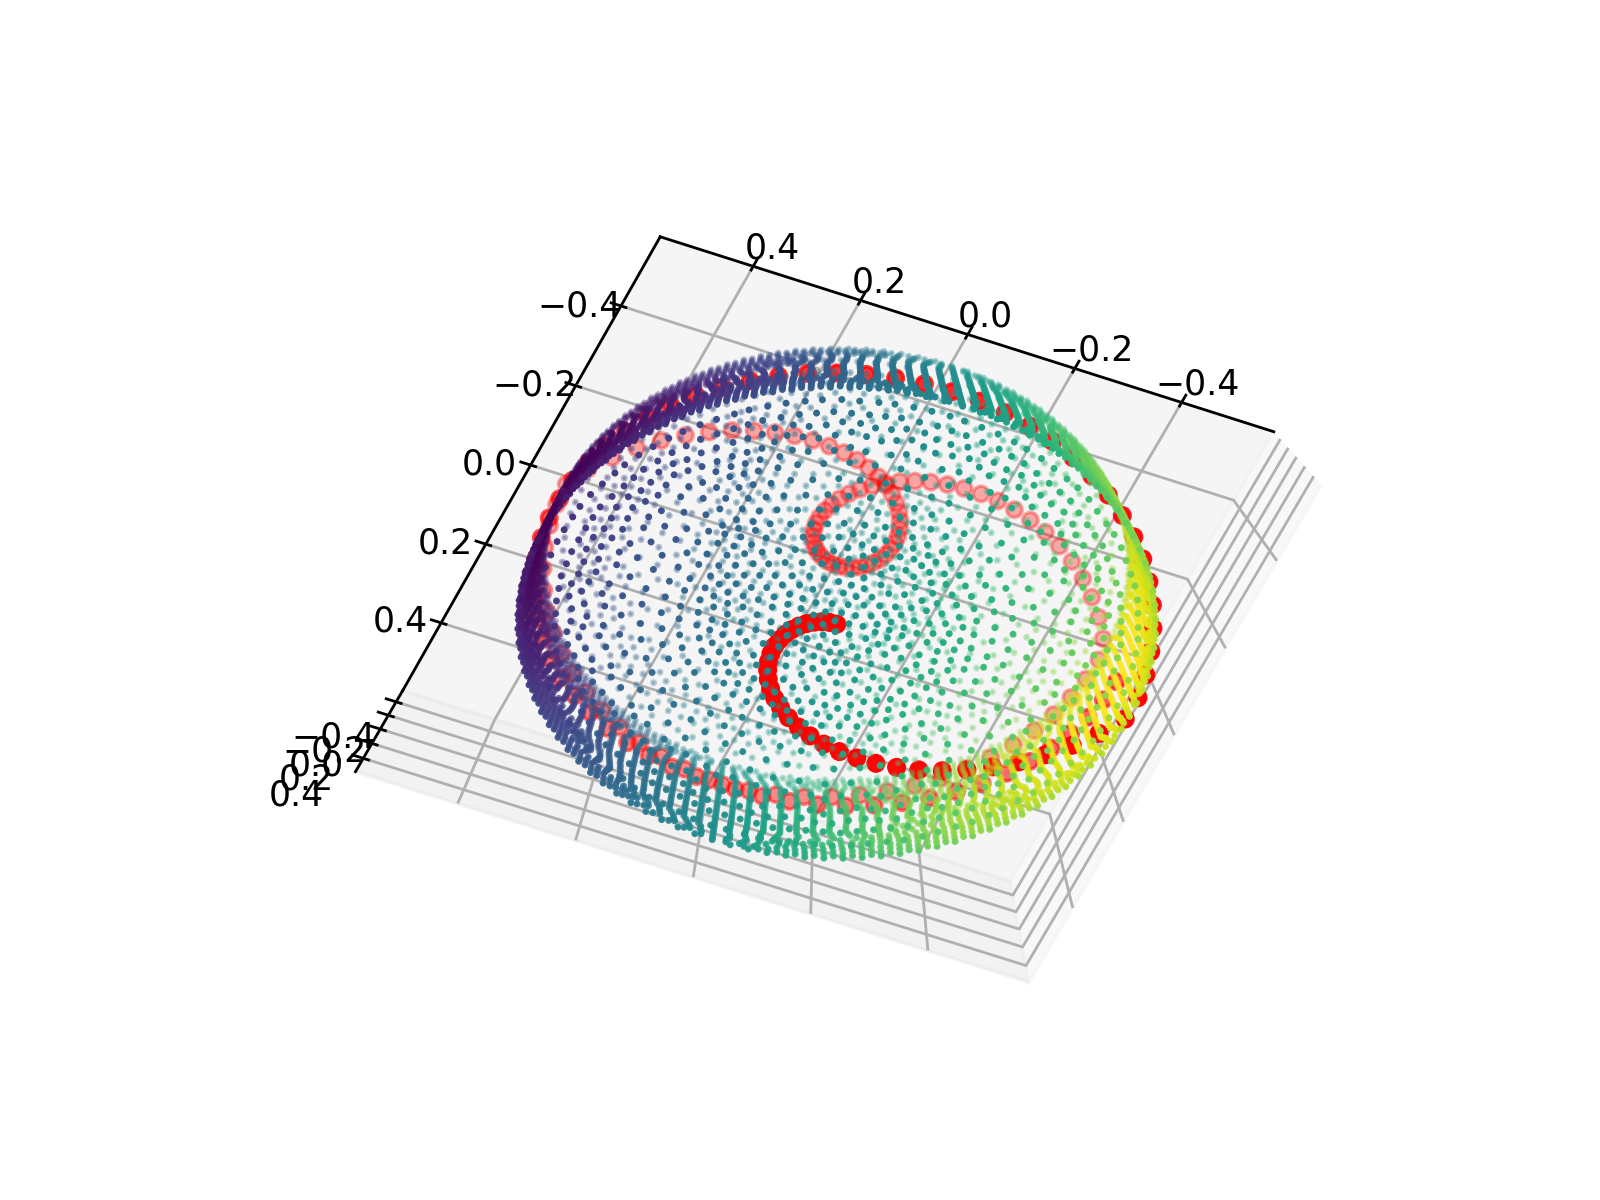

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X,Y,Z,c=A, s=1)
ax.scatter(allpoints[:,0],allpoints[:,1],allpoints[:,2],c='r')

In [ ]:
allpoints